# Importing the basic libraries for reading data and plotting

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
# this ignores warning to make the output easy to read if there was a warning
warnings.filterwarnings('ignore')

# loading data

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# Displaying the first 5 rows of each dataframe

In [3]:
train.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,...,variable13,variable14,variable15,variable16,variable17,variable18,variable19,variable20,variable21,classLabel
0,b,16.0,92.0,3,35e-05,y,p,k,v,0,...,f,0,f,s,200,0,2e+06,NaN,0,no.
1,b,31.0,25.0,0,0001125,u,g,ff,ff,0,...,1,f,g,96,19,960000,t,0,no.,NaN
2,a,48.0,17.0,0,0001335,u,g,i,o,0,...,f,0,f,g,0,120,0,NaN,0,no.
3,b,32.0,33.0,0,00035,u,g,k,v,0,...,f,0,t,g,232,0,2320000,f,0,no.
4,a,34.0,83.0,0,000125,y,p,i,h,0,...,f,0,t,g,160,0,1600000,f,0,no.


In [4]:
test.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,...,variable13,variable14,variable15,variable16,variable17,variable18,variable19,variable20,variable21,classLabel
0,b,16.0,92.0,3,35e-05,y,p,k,v,0,...,f,0,f,s,200,0,2e+06,NaN,0,no.
1,b,31.0,25.0,0,0001125,u,g,ff,ff,0,...,1,f,g,96,19,960000,t,0,no.,NaN
2,a,48.0,17.0,0,0001335,u,g,i,o,0,...,f,0,f,g,0,120,0,NaN,0,no.
3,b,32.0,33.0,0,00035,u,g,k,v,0,...,f,0,t,g,232,0,2320000,f,0,no.
4,a,34.0,83.0,0,000125,y,p,i,h,0,...,f,0,t,g,160,0,1600000,f,0,no.


In [5]:
print("no of records in training dataset is : ", train.shape[0])
print("no of records in testing dataset is : ", test.shape[0])

no of records in training dataset is :  3699
no of records in testing dataset is :  3699


# Resplitting the data
I can see that half of data is test se i will concatenate the 2 dataframes so that I can split again but with bigger percintage for taining 

In [6]:
data = pd.concat([train, test], axis=0)
data=data.reset_index(drop=True)

# Getting column names and datatypes 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   7320 non-null   object 
 1   variable2   7320 non-null   float64
 2   variable3   7398 non-null   float64
 3   variable4   7398 non-null   object 
 4   variable5   7270 non-null   object 
 5   variable6   7270 non-null   object 
 6   variable7   7270 non-null   object 
 7   variable8   7266 non-null   object 
 8   variable9   7394 non-null   object 
 9   variable10  7398 non-null   object 
 10  variable11  7398 non-null   object 
 11  variable12  7398 non-null   object 
 12  variable13  7398 non-null   object 
 13  variable14  7398 non-null   object 
 14  variable15  7268 non-null   object 
 15  variable16  7394 non-null   object 
 16  variable17  7168 non-null   object 
 17  variable18  7002 non-null   object 
 18  variable19  5868 non-null   object 
 19  variable20  4898 non-null  

# Counting missing values

In [8]:
data.isnull().sum()

variable1       78
variable2       78
variable3        0
variable4        0
variable5      128
variable6      128
variable7      128
variable8      132
variable9        4
variable10       0
variable11       0
variable12       0
variable13       0
variable14       0
variable15     130
variable16       4
variable17     230
variable18     396
variable19    1530
variable20    2500
variable21     710
classLabel    3382
dtype: int64

# Handling missing values by 2 ways 
1-fill null values with mean of the column data if it's numeric                                                    
2-delete rows in class label column and with categorical data

In [9]:
data.dropna(subset=["classLabel","variable1","variable8","variable9"],inplace=True)

In [10]:
data.isnull().sum()

variable1        0
variable2        0
variable3        0
variable4        0
variable5        0
variable6        0
variable7        0
variable8        0
variable9        0
variable10       0
variable11       0
variable12       0
variable13       0
variable14       0
variable15       0
variable16       0
variable17      66
variable18       0
variable19      66
variable20    2366
variable21       0
classLabel       0
dtype: int64

### I see that alot of variable 20 column is null and if I deleted the rows with null I will lose important data so Insted I will remove that variable  

In [11]:
data.drop(columns="variable20",inplace=True)
data.rename(columns={'variable21':'variable20'}, inplace=True)

# Changing columns with numbers from object dtype to numeric dtype 

In [12]:
data["variable4"]=pd.to_numeric(data["variable4"])
data["variable5"]=pd.to_numeric(data["variable5"])
data["variable10"]=pd.to_numeric(data["variable10"])
data["variable11"]=pd.to_numeric(data["variable11"])
data["variable14"]=pd.to_numeric(data["variable14"])
data["variable17"]=pd.to_numeric(data["variable17"])
data["variable18"]=pd.to_numeric(data["variable18"])
data["variable19"]=pd.to_numeric(data["variable19"])
data["variable20"]=pd.to_numeric(data["variable20"])
data.fillna(data.mean(), inplace=True)

# Exploring data in each column

In [13]:
for i in range(1,21):
    col="variable"+str(i)
    print("variable",i ,"has ",data[col].unique())

variable 1 has  ['b' 'a']
variable 2 has  [16. 48. 32. 34. 21. 28. 18. 24. 17. 51. 31. 25. 40. 30. 22. 27. 26. 47.
 33. 37. 59. 42. 53. 54. 20. 23. 41. 39. 35. 44. 52. 43. 19. 29. 45. 50.
 49. 38. 36. 15. 56. 64. 46. 55.]
variable 3 has  [92. 17. 33. 83. 75. 58. 42. 67.  5. 25.  8.]
variable 4 has  [3 0 8 7 6 4 1 5 2 9]
variable 5 has  [3.5000e-04 1.3350e+03 3.5000e+01 1.2500e+02 7.5000e-04 1.0250e+03
 1.3665e+04 1.0000e+00 2.0400e+02 1.5500e+02 3.2500e+02 2.3350e+03
 8.1250e+03 2.5000e+01 1.3750e+03 5.0000e-05 1.5000e+01 1.0400e+02
 4.2500e+02 1.0750e+03 3.0400e+02 1.5400e+02 4.9150e+03 5.5000e+01
 9.6250e+03 2.5400e+02 9.4150e+03 6.5000e+01 7.0000e-05 3.1650e+03
 5.0850e+03 1.1500e+02 1.1650e+03 2.7500e+02 3.1250e+03 1.5000e-04
 4.5000e+01 5.8350e+03 1.7500e+02 1.7100e+02 6.6650e+03 6.5000e-04
 3.0000e-05 4.6250e+03 4.0000e-05 1.8350e+03 1.1000e+01 5.1250e+03
 8.4600e+02 2.5210e+03 1.0915e+04 6.0000e-05 8.5000e-04 9.0000e-05
 4.0850e+03 2.4150e+03 1.0800e+02 1.0085e+04 9.7500e+02 9.5

# Saving data after cleaning to save time in case of using again 

In [14]:
data.to_csv ('alldata.csv', index = False, header=True)

# Eploring the distribution of the labels

number of samples in each class
yes.    3680
no.      294
Name: classLabel, dtype: int64


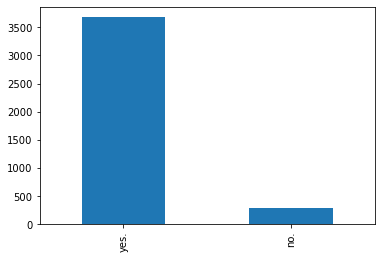

In [15]:
y=data["classLabel"]
y.value_counts().plot(kind='bar')
print("number of samples in each class")
print(y.value_counts())
data.drop(columns=["classLabel"],inplace=True)

# Find correlation between columns

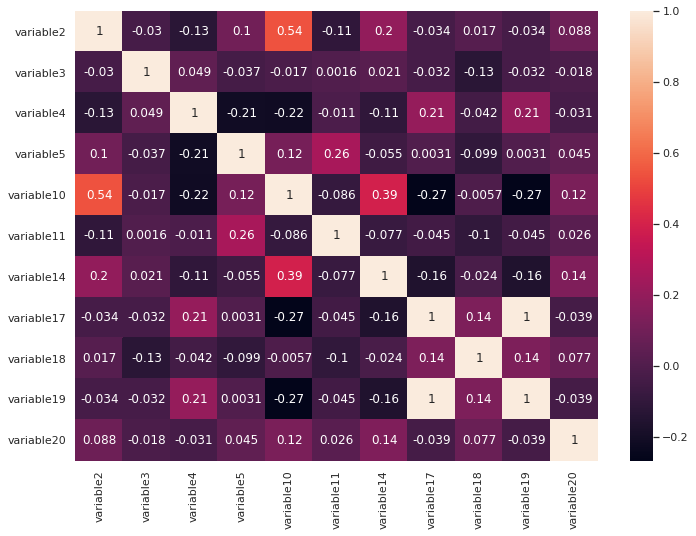

In [16]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## there is no big correlation between the columns so i will use all columns

# Converting categorical variables in features and label data to numbers

In [17]:
data=pd.get_dummies(data)
data.head()

,variable2,variable3,variable4,variable5,variable10,variable11,variable14,variable17,variable18,variable19,...,variable9_v,variable12_f,variable12_t,variable13_f,variable13_t,variable15_f,variable15_t,variable16_g,variable16_p,variable16_s
0,16.0,92.0,3,0.00035,0,29,0,200.0,0,2000000.0,...,1,1,0,1,0,1,0,0,0,1
2,48.0,17.0,0,1335.00000,0,335,0,0.0,120,0.0,...,0,1,0,1,0,1,0,1,0,0
3,32.0,33.0,0,35.00000,0,5,0,232.0,0,2320000.0,...,1,1,0,1,0,0,1,1,0,0
4,34.0,83.0,0,125.00000,0,5,0,160.0,0,1600000.0,...,0,1,0,1,0,0,1,1,0,0
6,21.0,17.0,8,0.00075,0,25,0,280.0,204,2800000.0,...,0,1,0,1,0,1,0,1,0,0


In [18]:
from sklearn import preprocessing

le1 = preprocessing.LabelEncoder()
le1.fit(y)
y=le1.transform(y) 
y = pd.DataFrame(y,columns=['y'])


In [19]:
x=data.loc[:,:].values
y = y.loc[:,:].values

# Perform over-sampling using Adaptive Synthetic (ADASYN) sampling approach for imbalanced datasets 
this approach can help in 2 ways                                                                                         
1- solve imbalance problem                                                                                          
2- will avoid overfitting that can be made by dublicating data

In [20]:
from imblearn.over_sampling import ADASYN
sampler = ADASYN()
X_rs, y_rs = sampler.fit_sample(x, y)

# Importing machine learning models

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Splitting the data to 70% train 30% test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.30, random_state=42)

# Builind different machine learning models to get the best model
# Using cross validation i can get more accurate estimate of out-of-sample accuracy

In [23]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('model %s: average accuracy = %f and best accuracy = %f' % (name, cv_results.mean(), cv_results.max()))

model LR: average accuracy = 0.649585 and best accuracy = 0.677734
model LDA: average accuracy = 0.885415 and best accuracy = 0.919765
model KNN: average accuracy = 0.989442 and best accuracy = 0.994129
model CART: average accuracy = 1.000000 and best accuracy = 1.000000
model NB: average accuracy = 0.624958 and best accuracy = 0.663405
model SVM: average accuracy = 1.000000 and best accuracy = 1.000000


# From the last output i decided to use svm to build the model

In [24]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Confusion matrix to get accuracy of the model in each class 

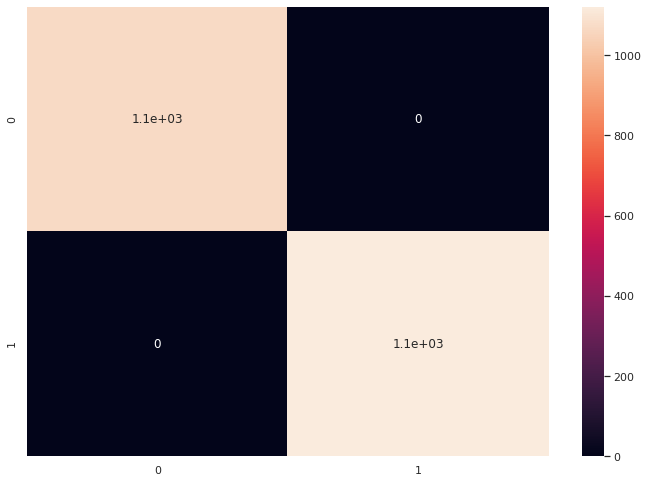

In [25]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
con=confusion_matrix(y_test, predictions)
sn.heatmap(con, annot=True)
plt.show()

# Saving the model to use it in flask app

In [26]:
import pickle
pickle.dump(model, open('model.pkl','wb'))